# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

## Библиотеки

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 1. Загрузка данных

In [5]:
url = "D://Downloads//Лекция_2//Лекция_2//adult.csv"


In [6]:
df = pd.read_csv(url)

## 2. Первичный анализ данных

In [7]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


## a) проверьте данные на пропуски. Удалите в случае обнаружения.

Заменим "?" на NaN

In [9]:
df.replace('?', pd.NA, inplace=True)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


Проверим количество пропусков в каждом столбце

In [11]:
print("Количество NA в каждом столбце до удаления:")
print(df.isna().sum())

Количество NA в каждом столбце до удаления:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


Удалим строки с пропусками

In [12]:
df = df.dropna(how='any')

## b) постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

### Гистограмма распределения возраста с выделением уровней дохода

In [13]:
def to_percent(y, position):
    return f'{y * 100:.0f}%'

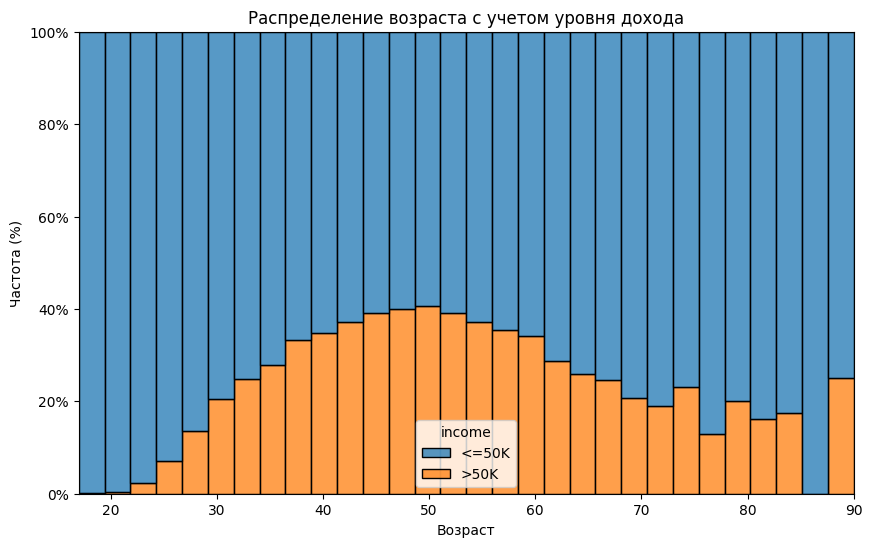

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', bins=30,  multiple='fill')

plt.title('Распределение возраста с учетом уровня дохода')

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xlabel('Возраст')
plt.ylabel('Частота (%)')
plt.show()


Гистограмма позволяет увидеть распределение возраста в выборке. Это может помочь понять, как возраст влияет на уровень дохода.

### Гистограмма распределения возраста с выделением уровней дохода

In [15]:
def thousands_formatter(x, pos):
    return f'{x/1000:.2f}k'


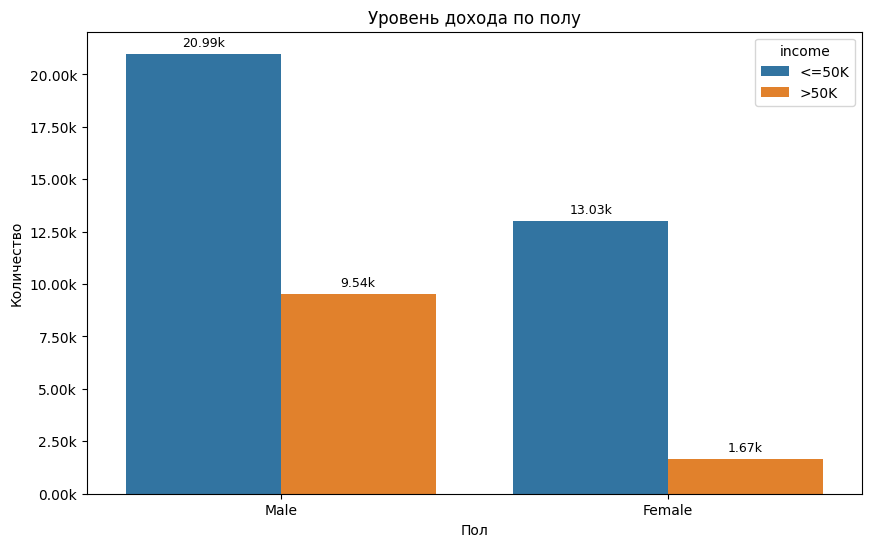

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='income', data=df)
plt.title('Уровень дохода по полу')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + (max(ax.get_ylim()) * 0.01), 
            f'{height/1000:.2f}k',
            ha='center', va='bottom', fontsize=9
        )
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

Гистограмма позволяет увидеть распределение дохода по полу.

### c) Преобразование категориальных признаков

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [19]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

## 3. Разделение выборки

Список категориальных признаков

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns

Использование Label Encoding

In [22]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass        45222 non-null  int64
 2   fnlwgt           45222 non-null  int64
 3   education        45222 non-null  int64
 4   educational-num  45222 non-null  int64
 5   marital-status   45222 non-null  int64
 6   occupation       45222 non-null  int64
 7   relationship     45222 non-null  int64
 8   race             45222 non-null  int64
 9   gender           45222 non-null  int64
 10  capital-gain     45222 non-null  int64
 11  capital-loss     45222 non-null  int64
 12  hours-per-week   45222 non-null  int64
 13  native-country   45222 non-null  int64
 14  income           45222 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB
None


In [24]:
X = df.drop('income', axis=1)
y = df['income']


In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Обучение моделей

### Логистическая регрессия

In [26]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


D:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
log_reg_accuracy = log_reg.score(X_test, y_test)
print(f'Точность логистической регрессии: {log_reg_accuracy:.2f}')

Точность логистической регрессии: 0.81


### Модель опорных векторов

In [28]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [29]:
svm_accuracy = svm_model.score(X_test, y_test)
print(f'Точность модели опорных векторов: {svm_accuracy:.2f}')

Точность модели опорных векторов: 0.79


## 5. Выводы

### a) кратко опишите какие преобразования были сделаны с данными.


В процессе работы с данными были удалены пропуски, а также преобразованы категориальные признаки в числовой формат с помощью one-hot encoding. Это позволило подготовить данные для обучения моделей.

### b) cравните точность двух моделей.


In [30]:
print(f"Точность логистической регресс ии составила около {log_reg_accuracy:.2f}, в то время как модель опорных векторов показала точность {svm_accuracy:.2f}. Это позволяет сделать вывод о том, что логистический регрес лучше справился с задачей классификации. Модель опорных векторов лучше подходит для задач с обработкой многомерных данных. SVM эффективны при работе с такими данными, как классификация изображений и текста.")

Точность логистической регресс ии составила около 0.81, в то время как модель опорных векторов показала точность 0.79. Это позволяет сделать вывод о том, что логистический регрес лучше справился с задачей классификации. Модель опорных векторов лучше подходит для задач с обработкой многомерных данных. SVM эффективны при работе с такими данными, как классификация изображений и текста.


### c) напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Цель задания выполнена, для улучшения результата напрашивается не удалять пустые данные, а заполнять их модом или с помощью одной из моделей.

In [31]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])